# Section 2: PANDAS and Visualization

In this section you will be doing some preprocessing and exploratory data analysis for a dataset for the videogame FIFA19.  The dataset contains both data for the game as well as information about the players' real life careers.  You will be building toward running a regression. 

### 1. Read the two CSV files and then concatenate them
File paths are provided.
Check your dataframe with `df.head()`

https://www.kaggle.com/karangadiya/fifa19

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
filepaths = ['data/fifa_19_part_one.csv','data/fifa_19_part_two.csv']

In [2]:
# CODE HERE
def get_fifa_data():
    '''
    inputs: none
    ----
    returns: combined dataframe
    '''
    return pd.concat(pd.read_csv(path) for path in filepaths)

In [3]:
df = get_fifa_data()
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400.0


### 2. Check for duplicates
First, check how many rows are in the dataset, then check how many unique values are in the "ID" column.

In [4]:
#code here to see the size of the dataframe
df.shape

(20000, 88)

In [5]:
#code here to check number of unique ids
df.ID.nunique()

18207

### 3. Drop Duplicates
You should see 18207 unique IDs, meaning there are duplicates.  Get rid of them by dropping duplicate rows.

In [6]:
#code here
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(18207, 88)

### 4. Drop n/a rows for "Release Clause"
Drop rows for which "Release Clause" is none or not given.  This is part of a soccer player's contract dealing with being bought out by another team.  Release Clause will be the target variable for our regression model. There should be 16,643 rows when you are done.

In [8]:
df.dropna(subset=['Release Clause'],inplace=True)

In [9]:
df.shape

(16643, 88)

### 5. Convert players' heights to inches. Replace the original height column.
First create a function, then use it on your dataframe. If it's `nan` then return `nan`.

In [1]:
#code here to write a helper function
def convert_height(height):
    split = height.split("'")
    return int(split[0])*12 + int(split[1])

In [2]:
#test here
convert_height("5'7")

67

In [12]:
#code here to use the function on the height column
df['Height'] = df.Height.apply(lambda x: convert_height(x))

### 6. Make histograms of 3 different continuous statistics
Bonus points for labeling axes and adding chart titles.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

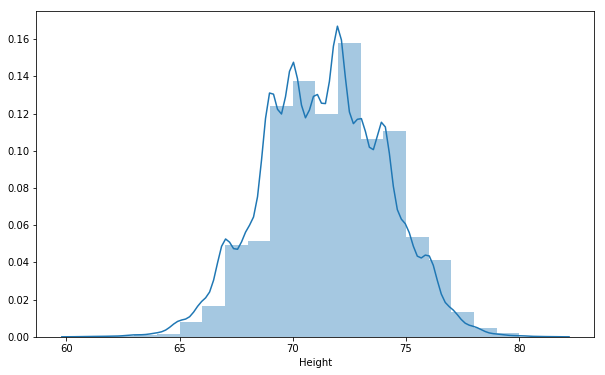

In [14]:
plt.subplots(figsize=(10,6))
sns.distplot(df.Height, bins=range(min(df.Height),max(df.Height)))

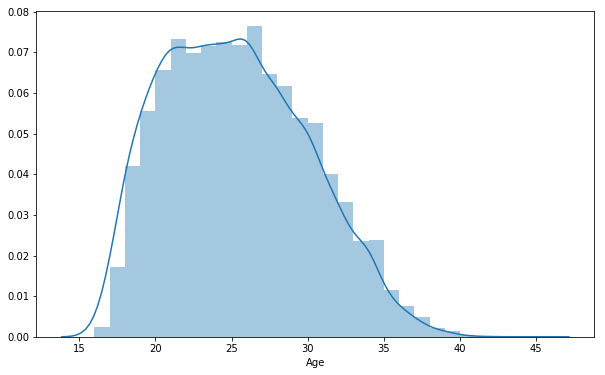

In [15]:
plt.subplots(figsize=(10,6))
sns.distplot(df.Age,bins=range(15,45))

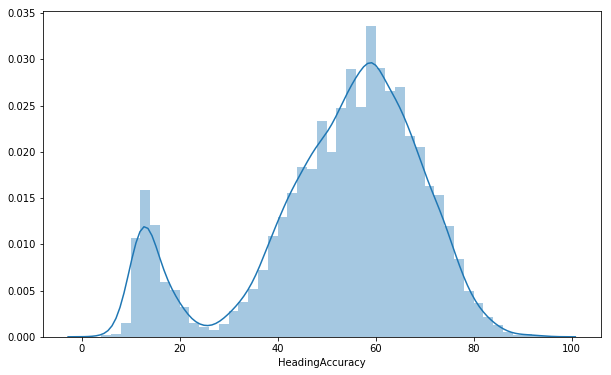

In [16]:
plt.subplots(figsize=(10,6))
sns.distplot(df.HeadingAccuracy,bins=range(0,100,2))

### 7. Make a bar chart for the 10 countries with the most players (by nationality)

In [17]:
#code here to get the top 10 countries with the most players
df.Nationality.value_counts()[0:10]

England        1475
Germany        1151
Spain           974
France          853
Argentina       833
Brazil          788
Italy           579
Colombia        570
Japan           455
Netherlands     426
Name: Nationality, dtype: int64

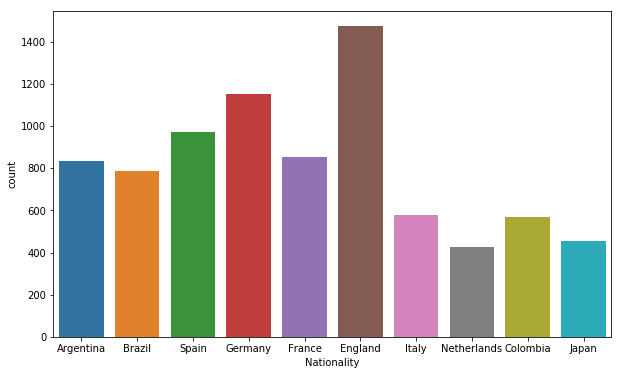

In [18]:
#code here to plot a bar chart
plt.subplots(figsize=(10,6))
sns.countplot(
    df.loc[
        df['Nationality'].isin(df.Nationality.value_counts()[0:10].keys())
    ]['Nationality'],
)

### 8. What is the difference between a bar chart and a histogram?

// answer here //

A bar chart shows quantities of different categories whereas histograms show distributions.

### 9. Make a scatter plot for the player stats StandingTackle and SlidingTackle
These two variables should be highly correlated.

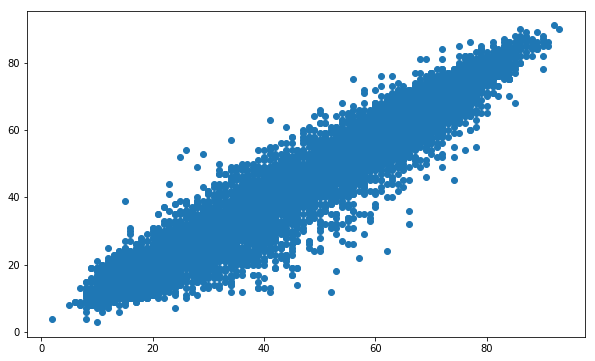

In [19]:
plt.subplots(figsize=(10,6))
plt.scatter(df['StandingTackle'], df['SlidingTackle'])

# Section 3: NUMPY and Statistics

We'll continue using the same FIFA 2019 dataset.  This section will assess your ability to use numpy and work with summary statistics.

### 1. Convert the Release Clause Price from Euros to Dollars
Store in a new column release_clause_dollars
Do <b>not</b> use the `apply` method.
1.2 Dollars = 1 Euro.

In [20]:
df['release_clause_dollars'] = df['Release Clause'] * 1.2

### 2. Get summary statistics for all numeric columns
(Please don't do each column individually!)

In [21]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,release_clause_dollars
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,...,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,1.664300e+04
mean,213845.010094,25.226221,66.162771,71.140900,1595.383404,1.114823,2.942919,2.349516,19.657213,71.357327,...,47.328967,47.776302,45.751607,16.747521,16.515712,16.355765,16.503936,16.837409,228201.273629,2.738415e+05
std,30546.285826,4.716588,7.008236,6.151409,275.723076,0.398559,0.659933,0.755855,16.054811,2.642547,...,19.937220,21.681809,21.295201,17.832273,17.033907,16.615668,17.151713,18.090985,299251.865865,3.591022e+05
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,61.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,1.200000e+03
25%,199569.500000,21.000000,62.000000,67.000000,1452.000000,1.000000,3.000000,2.000000,8.000000,69.000000,...,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2500.000000,3.000000e+03
50%,221493.000000,25.000000,66.000000,71.000000,1633.000000,1.000000,3.000000,2.000000,17.000000,71.000000,...,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,19800.000000,2.376000e+04
75%,236802.000000,29.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,73.000000,...,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,431000.000000,5.172000e+05
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,81.000000,...,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,999000.000000,1.198800e+06


### 3. What is the mean age and the median age?  What does each mean?

// answer here //

### 4. What is the standard deviation of "International Reputation"?  What does this tell you about the distribution of this variable, which is incremental from 1-5?

// answer here //

### 5. What are the covariance and correlation between "SprintSpeed" and "Agility"? 
- What is the difference between covariance and correlation?
- What can you infer from the relationship between these variables?
- Why might it not be a good idea to include both of these in a regression model?

In [24]:
#code here
print('Correlation:',np.corrcoef(df['SprintSpeed'],df['Agility'])[0][1])
print('Covariance:',np.cov(df['SprintSpeed'],df['Agility'])[0][1])

Correlation: 0.76386064764907
Covariance: 166.97720711252782


// answer here //

### 6. Do a linear regression.

Let's see how well each players' in-game stats reflect their real-world monetary value as a player. We  will not be considering real-world factors for this model.

- y variable: Release Clause
- x variables: 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes'

https://github.com/learn-co-curriculum/dsc-ols-statsmodels

In [23]:
#code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

Y = df['Release Clause']
X = df[['Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Release Clause   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     82.81
Date:                Thu, 23 May 2019   Prob (F-statistic):               0.00
Time:                        14:42:26   Log-Likelihood:            -2.3220e+05
No. Observations:               16643   AIC:                         4.645e+05
Df Residuals:                   16609   BIC:                         4.647e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.058e+06   2.92e+04     36.213      0.000       1e+06    1.12e+06
Finishing        -186.6904    364.909     -0.512      0.609    -901.952     528.571
HeadingAccuracy -1721.8142    306.031     -5.626      0.000   -2321.668   -1121.960
ShortPassing    -1537.6988    518.249     -2.967      0.003   -2553.522    -521.876
Volleys           524.5785    316.543      1.657      0.097     -95.879    1145.037
Dribbling       -1816.1692    444.153     -4.089      0.000   -2686.757    -945.582
Curve            -251.8955    302.036     -0.834      0.404    -843.917     340.126
FKAccuracy         65.0183    275.312      0.236      0.813    -474.624     604.660
LongPassing        54.3319    380.871      0.143      0.887    -692.215     800.879
BallControl     -2344.5367    557.525     -4.205      0.000   -3437.345   -1251.728
Acceleration     -570.2972    427.689     -1.333      0.182   -1408.614     268.019
SprintSpeed     -1320.4425    395.892     -3.335      0.001   -2096.434    -544.451
Agility          1269.9876    317.384      4.001      0.000     647.882    1892.094
Reactions       -6076.8710    420.977    -14.435      0.000   -6902.031   -5251.711
Balance           831.8455    287.459      2.894      0.004     268.394    1395.296
ShotPower       -1234.1000    322.514     -3.826      0.000   -1866.262    -601.938
Jumping           -91.6105    225.000     -0.407      0.684    -532.634     349.413
Stamina           771.8079    261.189      2.955      0.003     259.849    1283.767
Strength         1179.3792    272.289      4.331      0.000     645.663    1713.095
LongShots         662.1502    343.207      1.929      0.054     -10.572    1334.872
Aggression       -229.7008    241.165     -0.952      0.341    -702.410     243.008
Interceptions     189.3008    349.249      0.542      0.588    -495.264     873.866
Positioning       753.9676    332.317      2.269      0.023     102.590    1405.345
Vision           -512.8898    314.196     -1.632      0.103   -1128.747     102.967
Penalties         599.0759    298.530      2.007      0.045      13.925    1184.227
Composure       -1675.2161    339.233     -4.938      0.000   -2340.149   -1010.283
Marking            61.3220    280.417      0.219      0.827    -488.325     610.969
StandingTackle   -256.3604    519.643     -0.493      0.622   -1274.915     762.195
SlidingTackle     278.6254    481.464      0.579      0.563    -665.096    1222.347
GKDiving        -2157.8749    648.490     -3.328      0.001   -3428.984    -886.766
GKHandling       -923.1711    655.277     -1.409      0.159   -2207.583     361.241
GKKicking        -924.0726    603.179     -1.532      0.126   -2106.367     258.222
GKPositioning    -363.0774    641.463     -0.566      0.571   -1620.412     894.258
GKReflexes       -507.0585    644.356     -0.787      0.431

### 7. Interpret the results of the regression.
What do R-squared, p-values, and coefficients mean?  What would adding or removing variables do to the model?  According to this model, which is the most important factor in determining a high release clause?

// answer here //